# Incidence

## Quarto

Quarto enables you to weave together content and executable code into a
finished document. To learn more about Quarto see <https://quarto.org>.

## Running Code

When you click the **Render** button a document will be generated that
includes both content and the output of embedded code. You can embed
code like this:

In [ ]:
1 + 1

[1] 2

You can add options to executable code like this

In [ ]:
#| echo: false
2 * 2

[1] 4

In [ ]:
#| label: load-pkgs
library(tidyverse)

── Attaching core tidyverse packages ─────────────────── tidyverse 2.0.0.9000 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

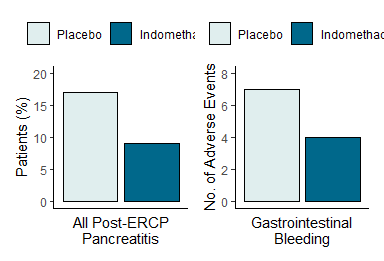

In [ ]:
#| label: fig-incidences-adverse-events
#| fig-cap: Incidence of the Primary and Secondary End Points and Adverse Events
#| fig-width: 4
#| fig-asp: 0.681

# A - moderate to severe missing
plot_a <- indo_rct |> 
  count(rx, outcome) |>
  group_by(rx) |>
  mutate(p = n / sum(n)) |>
  filter(outcome == "1_yes") |>
  ungroup() |>
  mutate(
    rx = case_match(
      rx, 
      "0_placebo" ~ "Placebo",
      "1_indomethacin" ~ "Indomethacin"
    ),
    rx = fct_relevel(rx, "Placebo", "Indomethacin"),
    p = p*100
  ) |>
  ggplot(aes(x = rx, y = p, fill = rx)) +
  geom_col(color = "black") +
  scale_fill_manual(
    values = c(
      "Placebo" = "azure2", 
      "Indomethacin" =  "deepskyblue4"
    )
  ) + 
  theme_classic() +
  theme(
    legend.position = "top",
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  ) +
  ylim(0, 20) +
  labs(
    x = "All Post-ERCP\nPancreatitis",
    y = "Patients (%)",
    fill = NULL
  )

# renal failure missing
plot_b <- indo_rct |>
  filter(bleed == 1) |>
  mutate(
    rx = case_match(
      rx, 
      "0_placebo" ~ "Placebo",
      "1_indomethacin" ~ "Indomethacin"
      ),
    rx = fct_relevel(rx, "Placebo", "Indomethacin")
  ) |>
  count(rx, bleed) |>
  ggplot(aes(x = rx, y = n, fill = rx)) +
  geom_col(color = "black") +
  scale_fill_manual(
    values = c(
      "Placebo" = "azure2", 
      "Indomethacin" =  "deepskyblue4"
    )
  ) + 
  theme_classic() +
  theme(
    legend.position = "top",
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  ) +
  ylim(0, 8) +
  labs(
    x = "Gastrointestinal\nBleeding",
    y = "No. of Adverse Events",
    fill = NULL
  )

plot_a + plot_b